In [1]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [2]:
# Load iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [3]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Features:", X.columns.tolist())


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



Random Forest Feature Importance:
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


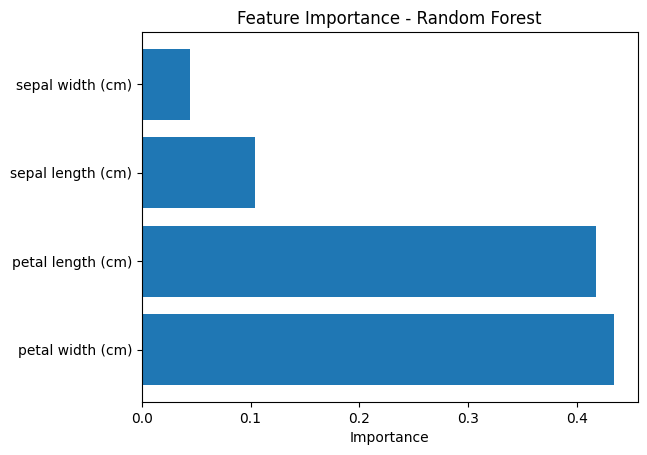

In [4]:
#### *Random Forest Example*

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Print and plot
print("\nRandom Forest Feature Importance:")
print(rf_importance_df)

plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


C:\Anaconda3\envs\dineshML\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:22:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Feature Importance:
             Feature  Importance
2  petal length (cm)    0.738762
3   petal width (cm)    0.220724
1   sepal width (cm)    0.030385
0  sepal length (cm)    0.010128


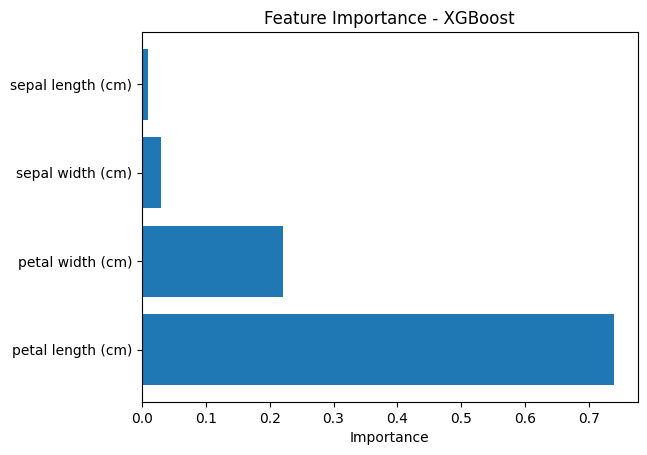

In [5]:
#### *XGBoost Example*

from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Get feature importance
xgb_importances = xgb.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Print and plot
print("\nXGBoost Feature Importance:")
print(xgb_importance_df)

plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.show()





Permutation Importance:
             Feature  Importance       Std
3   petal width (cm)    0.175556  0.036447
2  petal length (cm)    0.144444  0.038809
0  sepal length (cm)    0.000000  0.000000
1   sepal width (cm)    0.000000  0.000000


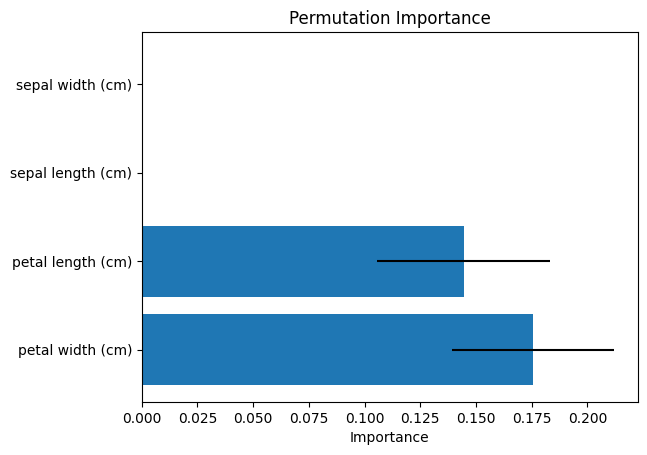

In [6]:
### *2. Permutation Importance*



from sklearn.inspection import permutation_importance

# Train a model (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Compute permutation importance on test set
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create DataFrame
perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
})
perm_df = perm_df.sort_values(by='Importance', ascending=False)

# Print and plot
print("\nPermutation Importance:")
print(perm_df)

plt.barh(perm_df['Feature'], perm_df['Importance'], xerr=perm_df['Std'])
plt.xlabel('Importance')
plt.title('Permutation Importance')
plt.show()




Correlation Matrix (Feature-to-Feature):
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


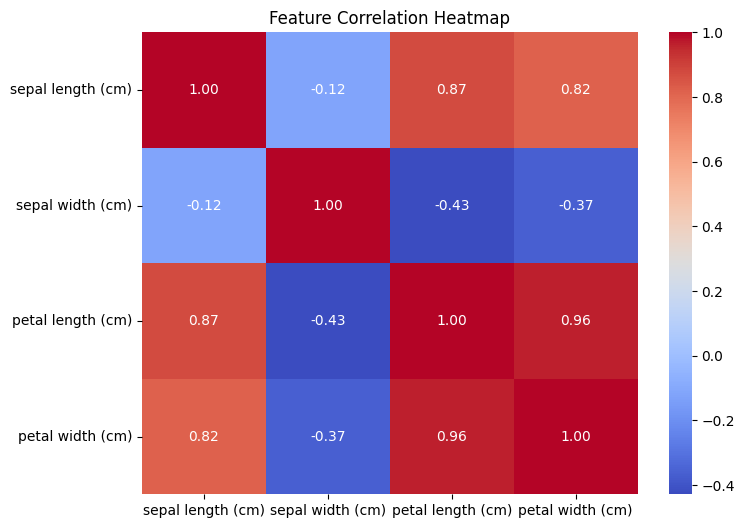

In [7]:
### *3. Statistical Methods*

#### *Correlation (Pearson)*

# Compute correlation matrix (features only, since target is categorical)
corr_matrix = X.corr()

# Print correlation matrix
print("\nCorrelation Matrix (Feature-to-Feature):")
print(corr_matrix)

# Plot heatmap (optional)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
#### *Chi-Square Test (Categorical Features)*

from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer

# Discretize continuous features into bins
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(X)

# Apply Chi-Square test
chi_scores, p_values = chi2(X_discretized, y)

# Create DataFrame
chi_df = pd.DataFrame({'Feature': feature_names, 'Chi2 Score': chi_scores, 'P-Value': p_values})
chi_df = chi_df.sort_values(by='Chi2 Score', ascending=False)

# Print results
print("\nChi-Square Test Results:")
print(chi_df)



Chi-Square Test Results:
             Feature  Chi2 Score       P-Value
3   petal width (cm)  160.423792  1.460213e-35
2  petal length (cm)  153.847826  3.911732e-34
0  sepal length (cm)   75.717842  3.614760e-17
1   sepal width (cm)   25.655172  2.685654e-06


C:\Anaconda3\envs\dineshML\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [9]:
#### *ANOVA F-Test*

from sklearn.feature_selection import f_classif

# Apply ANOVA F-Test
f_scores, p_values = f_classif(X, y)

# Create DataFrame
anova_df = pd.DataFrame({'Feature': feature_names, 'F-Score': f_scores, 'P-Value': p_values})
anova_df = anova_df.sort_values(by='F-Score', ascending=False)

# Print results
print("\nANOVA F-Test Results:")
print(anova_df)



ANOVA F-Test Results:
             Feature      F-Score       P-Value
2  petal length (cm)  1180.161182  2.856777e-91
3   petal width (cm)   960.007147  4.169446e-85
0  sepal length (cm)   119.264502  1.669669e-31
1   sepal width (cm)    49.160040  4.492017e-17



SHAP Summary Plot:


<Figure size 640x480 with 0 Axes>

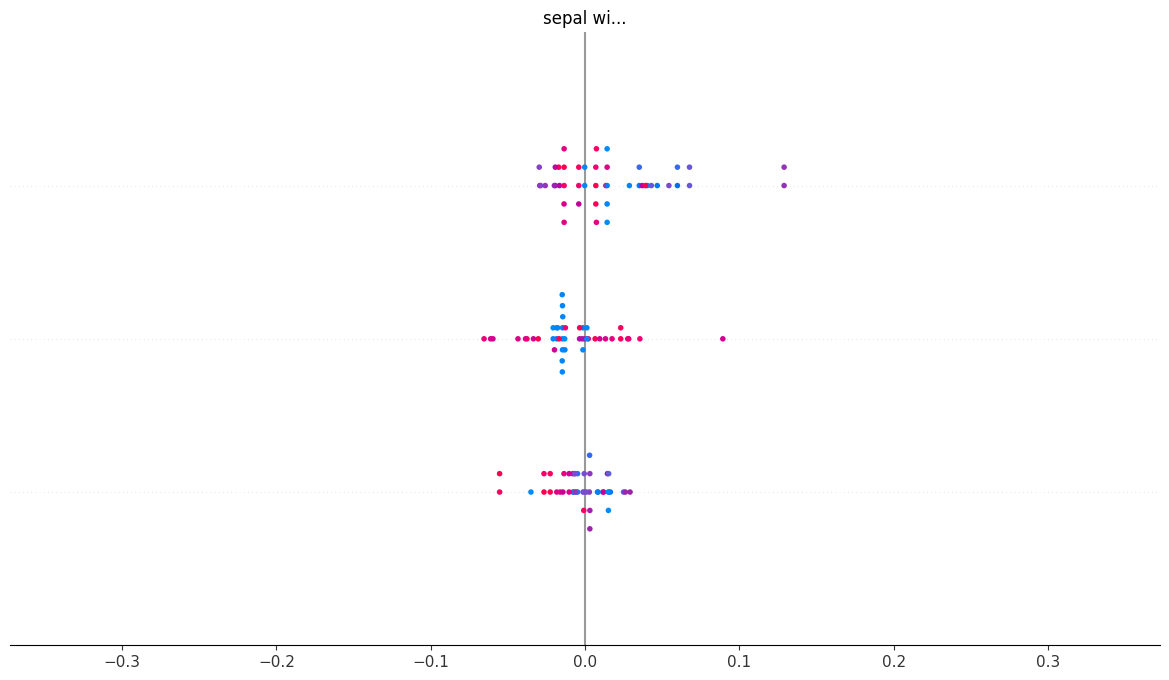

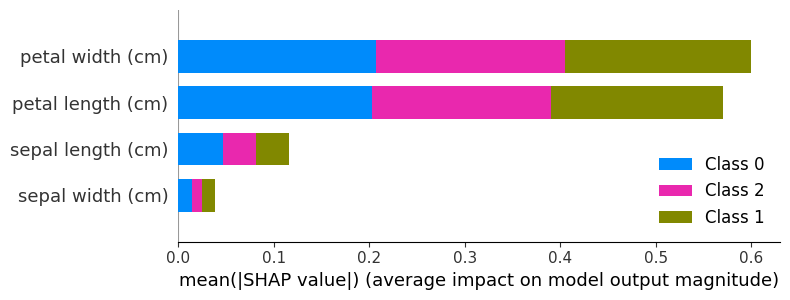

In [10]:
### *4. SHAP and LIME*

#### *SHAP (SHapley Additive exPlanations)*

import shap

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
print("\nSHAP Summary Plot:")
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# Bar plot for overall feature importance
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")


C:\Anaconda3\envs\dineshML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



LIME Explanation for First Test Instance:


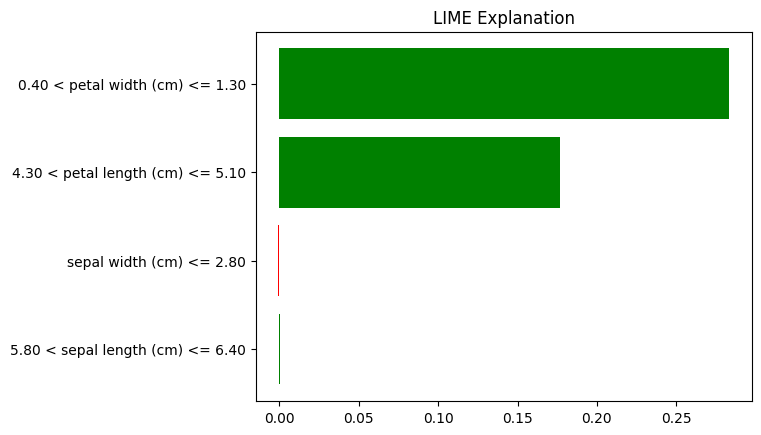

In [11]:
#### *LIME (Local Interpretable Model-agnostic Explanations)*

from lime.lime_tabular import LimeTabularExplainer

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create LIME explainer
explainer = LimeTabularExplainer(
    X_train.values, 
    feature_names=feature_names, 
    class_names=data.target_names, 
    mode='classification'
)

# Explain a single prediction (e.g., first test instance)
exp = explainer.explain_instance(X_test.iloc[0].values, model.predict_proba, num_features=4)

# Show explanation
print("\nLIME Explanation for First Test Instance:")
exp.show_in_notebook()  # Use this in Jupyter; otherwise, save or print
exp.as_pyplot_figure()
plt.title('LIME Explanation')
plt.show()




